# Group Number: Group-1

## Course Code: AIDI-1100-02
## Group Members: 
1. KrishnaMohan Pingali(100820336) 
2. Monica Prithvi Kalyani Karingula(100805011)
3. Mohseen Mehmood Shaikh(100799844)
4. Harsha Patel(100807201)

## Submission Date: 9th April,2021

###Initial setup to load custom module

1. Mounting the drive   
2. Update the system path with GDrive for colab

Note: There might be an issue with respect to authorization code of the Google Colab GDrive file.
If the initial setup for loading custom module fails, skip it and please follow below steps for manually adding the file:
1. Visit github link: - https://github.com/MohseenShaikh/AIDI_1100_02_FINAL
2. Download the **MyCalender.py** file
3. Upload it to the current colab file runtime to run the code



In [28]:
# Mount google drive to this colab file with authorization
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
# Check for the python files in th drive
!ls /content/gdrive/My\ Drive/*.py

In [ ]:
#We'll need to update our path to import from Drive.
import sys
sys.path.append('/content/gdrive/My Drive')

###PART 1
Periodical Scanning and Parsing of news from the newswire website

In [29]:
# Import the packages

#Webpage parsing --> use package BS4, function called BeautifulSoup
from bs4 import BeautifulSoup

# Call for html webpages 
import requests

# Import pandas
import pandas as pd

# Import regex
import re

In [30]:
# This is the demonstration of the custom module 
# import the custom module - MyCalender
from MyCalender import MyCalender

# instance of the MyCalender
my_calender = MyCalender()

# Fetch the past dates from the module
# This periodically fetches the data given the number of days
# For eg: to get a months data pass 30 as parameter
dates = my_calender.get_dates_list(7)
dates

['2021-04-04',
 '2021-04-05',
 '2021-04-06',
 '2021-04-07',
 '2021-04-08',
 '2021-04-09',
 '2021-04-10']

In [31]:
# Parses the news data for the given BeautifulSoup
# param: soup - BeautifulSoup object
# return: a tuple of list of title and desccription
def parseNews(soup):

  # Class name for filtering and parsing through BeautifulSoup
  class_name = {'class': 'remove-outline'}

  # Parse all the titles from the news site and store in titles list
  titles = []
  for h3 in soup.find_all('h3', class_name):  # considering the h3 for Title
    # Cleaning the parsed text for newline and leading trailing whitlines
    title_text = h3.text.replace('\n', ' ').strip()   
    
    titles.append(title_text)

  # Parse all the description from the news site and store in descriptions list
  descriptions = []
  for p in soup.find_all('p', class_name):   # considering the paragraph for description
    descriptions.append(p.text)

  return (titles, descriptions)

In [32]:
# Base URL for news release
BASE_URL = 'https://www.prnewswire.com/news-releases/news-releases-list/?'

# list for backdated ULRs
backdated_urls = []

# for loop appends all the parsed dates to the list 'backdated_urls'
# Iterate to make the back dated urls for fetching the data of particular date
for date in dates:
  split = date.split('-')
  param_path = 'month={}&day={}&year={}&hour=00'.format(split[1], split[2], split[0])
  
  backdated_urls.append(BASE_URL + param_path)


###PART 2
Store parsed news and scan the content of the news to find a stock symbol

In [33]:
# List to capture all titles and description parsed from the data
all_titles = []
all_desc = []

# Scrape the given url for news data
# The function scrape_url gets all the title and description of news returned by function parseNews()
# param: url - News url
# returns: Tuple with titles and descriptions
def scrape_url(url):
  
  # Call the request and fetch html data
  response = requests.get(url)

  # Load data into bs4
  soup = BeautifulSoup(response.text, 'html.parser')
  return parseNews(soup)

# Iterated all the backdated urls and store parsed titles and description of previous one week into all_titles[] and all_desc[]
for url in backdated_urls:
  titles, description = scrape_url(url)
  all_titles = all_titles + titles
  all_desc = all_desc + description


In [34]:
# Displays all the news titles of last one week
all_titles

['Apr 03, 2021, 23:44 ET Behold the pre-ICO Sale of Bitsfine with its BFN Token - a Futuristic Token Offering Multitude Benefits',
 'Apr 03, 2021, 19:42 ET Pomerantz Law Firm Announces the Filing of a Class Action against Kadmon Holdings, Inc., and Certain Officers - KDMN',
 'Apr 03, 2021, 12:23 ET Applus Team Working 24/7 On Systems Outage',
 'Apr 03, 2021, 09:49 ET Hi-Tech Pharmaceuticals Issues Allergy Alert on Various APS Isomorph 28 Products and iForce Nutrition Mass Gainz Dietary Supplements Due to Possible Undeclared Milk, Eggs, Wheat and Soy',
 'Apr 03, 2021, 08:19 ET Haldex Annual and Sustainability Report 2020',
 'Apr 03, 2021, 07:50 ET Alligator Bioscience postpones the Annual General Meeting to June 1, 2021',
 'Apr 03, 2021, 04:30 ET This Is a Test, Please Disregard - D',
 'Apr 03, 2021, 03:30 ET This Is a Test, Please Disregard - C',
 'Apr 04, 2021, 22:45 ET Wood Resources International LLC: The Global Sawlog Price Index rose 8% in the 4Q/20 as demand for logs was up in No

In [35]:
# a formatted table showing titles and respective description of all the parsed news of last one week
# create a dataframe to store the data 
dataframe = pd.DataFrame(list(zip(all_titles, all_desc)),
                        columns=['Title', 'Description'])

dataframe

,Title,Description
0,"Apr 03, 2021, 23:44 ET Behold the pre-ICO Sale...",The acceptance of blockchain technology is on ...
1,"Apr 03, 2021, 19:42 ET Pomerantz Law Firm Anno...",Pomerantz LLP announces that a class action la...
2,"Apr 03, 2021, 12:23 ET Applus Team Working 24/...","Hitachi, Ltd. (TSE : 6501, « Hitachi ») a anno..."
3,"Apr 03, 2021, 09:49 ET Hi-Tech Pharmaceuticals...","WHY: Rosen Law Firm, a global investor rights ..."
4,"Apr 03, 2021, 08:19 ET Haldex Annual and Susta...","Hitachi, Ltd. (TSE: 6501, „Hitachi"") hat heute..."
5,"Apr 03, 2021, 07:50 ET Alligator Bioscience po...",NanoVMs recently unveiled its most recent prod...
6,"Apr 03, 2021, 04:30 ET This Is a Test, Please ...","Hertz Global Holdings, Inc. (OTCPK:HTZGQ) (""He..."
7,"Apr 03, 2021, 03:30 ET This Is a Test, Please ...","The law firm of Kessler Topaz Meltzer & Check,..."
8,"Apr 04, 2021, 22:45 ET Wood Resources Internat...","WHY: Rosen Law Firm, a global investor rights ..."
9,"Apr 04, 2021, 20:35 ET Applus Provides Update",KEHUA TECH (002335.SZ) KEHUA a obtenu la 5e pl...


In [36]:
#gives number of rows and columns of above dataframe
dataframe.shape

(60, 2)

In [37]:
# Regex to match the company stock symbols
regex = '[A-Z]+: [A-Z]+'

# Lambda function to find all the symbols in the dataframe
find_symbols = lambda x: re.findall(regex, x)

# Filter the dataframe to search stock symbol
ddf = dataframe.Description.apply(find_symbols)

# Convert the dataframe to list
result = ddf.values.tolist()

# Clean and remove the empty values in the list
filtered = list(filter(None, result))
filtered

[['NASDAQ: KDMN'],
 ['WHY: R', 'NYSE: UAVS'],
 ['CEO: S'],
 ['NASDAQ: WKHS'],
 ['WHY: R', 'NASDAQ: EBIX'],
 ['NASDAQ: ROOT'],
 ['WHY: R', 'NASDAQ: REGI'],
 ['ABOUT: L'],
 ['CEO: S'],
 ['NYSE: IMAX'],
 ['NASDAQ: CATM'],
 ['NYSE: ATH'],
 ['NASDAQ: VLDR'],
 ['NASDAQ: APA'],
 ['NASDAQ: EH'],
 ['NASDAQ: BLUE'],
 ['NYSE: FUBO'],
 ['NASDAQ: AQST'],
 ['NYSE: XL'],
 ['NASDAQ: WKHS'],
 ['NYSE: FHS']]

In [38]:
#gives the first element from the list filtered[]
filtered[0]

['NASDAQ: KDMN']

In [39]:
# Consider the first value of the filtered list
all_symbol = filtered[0]

In [40]:
# Take default Tesla stock symbol if we dont get any from parsed values
if not all_symbol:
  all_symbol = ['TSX: TSLA']


In [41]:
# stores the company's symbol(second part of the filtered[0]) from all_symbol first element
company_symbol = all_symbol[0].split()[-1]

###Part 3
Scan Yahoo! Finance page for the stock symbol appeared in the news and get the stock prices and volume for last 10 days.

In [42]:
#stores the yahoo! finance url with fetched company_symbol
stock_symbol = company_symbol

# URL for historical page view
yahoo_url = f'https://finance.yahoo.com/quote/{stock_symbol}/history?p={stock_symbol}'

In [43]:
# Print the yahoo finance url
yahoo_url

'https://finance.yahoo.com/quote/KDMN/history?p=KDMN'

In [44]:
# Make a request to fetch the yahoo url historical data
yahoo_response = requests.get(yahoo_url)

# Load the recieve html data to BeautifulSoup
yahoo_soup = BeautifulSoup(yahoo_response.text, 'html.parser')

In [45]:
#variable all_rows stores all the rows of the table containing historical data in the form of html table rows <tr> format
all_rows = yahoo_soup.table.tbody.find_all('tr')

In [46]:
# this block enlists price, volume and date from fetched rows in all_rows in a dataframe
price_list = []
volume_list = []
date_list = []

# to get text from <td> tags fetched from table for price, volume and date
for tr in all_rows:

  data = tr.find_all('td')
  price = data[-2].text
  volume = data[-1].text
  date = data[0].text
  
  #Append price,volume and date in order to display in a dataframe
  price_list.append(price)
  volume_list.append(volume)
  date_list.append(date)

# Price and volume columns are created and filled in the dataframe together using 'zip'
df = pd.DataFrame(list(zip(price_list, volume_list)),
                       columns= ['Price', 'Volume'])
# date column is appended separately in order to convert the dates from string to date format
df['Date'] = pd.to_datetime(date_list)
df

,Price,Volume,Date
0,3.6600,"1,927,385",2021-04-09
1,3.8500,"1,203,000",2021-04-08
2,3.7600,"1,699,700",2021-04-07
3,3.8600,"2,638,400",2021-04-06
4,4.1500,"3,236,000",2021-04-05
...,...,...,...
95,3.9000,"2,791,400",2020-11-19
96,3.7500,"1,639,000",2020-11-18
97,3.8300,"2,714,500",2020-11-17
98,3.4900,"2,642,200",2020-11-16


In [47]:
# Parse the company name of symbol using the class params
company_name = yahoo_soup.find_all('h1', {'class': 'D(ib)'})[0].text

###Part 4 
Visualizations of stock prices for last 10 days showing time-series plot for Volume and Daily close price.

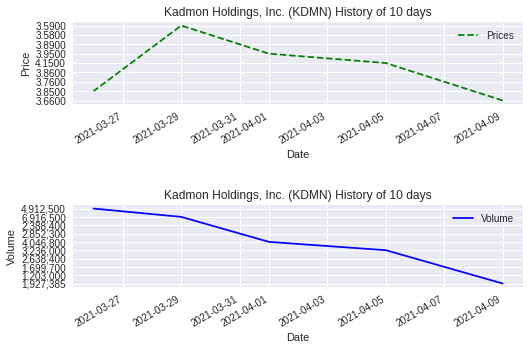

In [48]:
# Import packages for visual graph
import matplotlib.pyplot as plt

# Usage seaborn style
plt.style.use('seaborn')

# Subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) #MS

# The plotting Data
dates = df.Date[:10]
prices = df.Price[:10]
volumes = df.Volume[:10]

# Time-Price plot
ax1.plot(dates, prices, color='green', linestyle='--', label="Prices")
ax1.set_title(company_name + ' History of 10 days')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Time-Volume plot 
ax2.plot(dates, volumes, color='blue', label="Volume")
ax2.set_title(company_name + ' History of 10 days')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.legend()

plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right') 
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right') 
fig.subplots_adjust(bottom=0.8)

fig.tight_layout(pad=3.0)
plt.show()


The output seems to give a fair understanding about the Kadmon Holdings Inc. graph how within past 10 days their price fluctuated and volume slowly started steeping down